In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url1 = 'Pollution-Visakapatanam-1.csv'

url2 = 'Pollution-Visakapatanam.csv'

df1 = pd.read_csv(url1, error_bad_lines=False,parse_dates=True)
df2 = pd.read_csv(url2, error_bad_lines=False,parse_dates=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.shape

(374, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  374 non-null    object 
 1   To Date    374 non-null    object 
 2   PM2.5      364 non-null    float64
 3   PM10       363 non-null    float64
 4   NO         365 non-null    float64
 5   NO2        364 non-null    float64
 6   SO2        365 non-null    float64
 7   CO         365 non-null    float64
dtypes: float64(6), object(2)
memory usage: 23.5+ KB


In [ ]:
df1.describe()

,PM2.5,PM10,NO,NO2,SO2,CO
count,364.000000,363.000000,365.000000,364.000000,365.000000,365.000000
mean,41.884835,104.533058,17.730877,33.979341,15.125836,0.489945
std,22.244879,42.832165,11.047663,14.341848,5.059522,0.180634
min,5.290000,18.720000,0.490000,8.690000,3.540000,0.020000
25%,26.185000,75.220000,8.450000,24.420000,12.020000,0.370000
50%,35.730000,102.090000,16.130000,31.475000,14.210000,0.480000
75%,54.062500,127.765000,25.520000,40.542500,17.240000,0.610000
max,114.050000,231.970000,78.630000,90.020000,42.750000,1.120000


In [ ]:
df1.isnull().sum()

From Date     0
To Date       0
PM2.5        10
PM10         11
NO            9
NO2          10
SO2           9
CO            9
dtype: int64

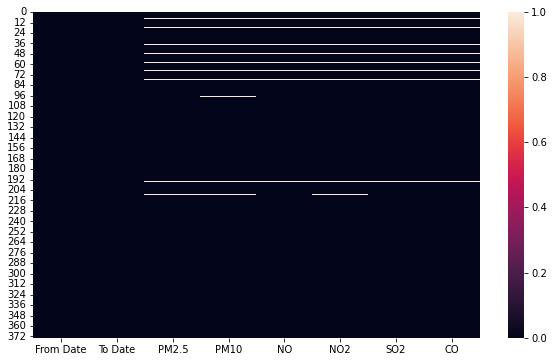

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull())

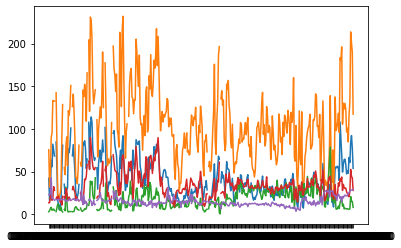

In [ ]:
features = ['PM2.5','PM10','NO','NO2','SO2','CO']
x = df1["From Date"]
for z in range(0,5):
  y = df1[features[z]]
  plt.plot(x, y)

In [ ]:
duplicate = df1.duplicated()
print(duplicate.sum())
df1[duplicate]

0


,From Date,To Date,PM2.5,PM10,NO,NO2,SO2,CO


In [ ]:
#median method
df1["PM2.5"].fillna(df1["PM2.5"].median(),inplace=True)
df1["PM10"].fillna(df1["PM10"].median(),inplace=True)
df1["NO"].fillna(df1["NO"].median(),inplace=True)
df1["NO2"].fillna(df1["NO2"].median(),inplace=True)
df1["SO2"].fillna(df1["SO2"].median(),inplace=True)
df1["CO"].fillna(df1["CO"].median(),inplace=True)

print(df1.isnull().sum())

From Date    0
To Date      0
PM2.5        0
PM10         0
NO           0
NO2          0
SO2          0
CO           0
dtype: int64


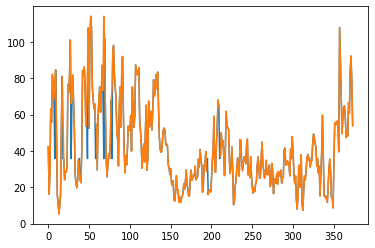

In [ ]:
x=df1['PM2.5']
plt.plot(x)
x= df2['PM2.5']
plt.plot(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["From Date"] = le.fit_transform(df1["From Date"])
df1["To Date"] = le.fit_transform(df1["To Date"])

In [ ]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state = 0)

In [ ]:
print(X_train)

[[222.   234.    55.51 ...  21.56  34.91  21.18]
 [352.   363.    31.52 ...  28.49  30.    13.6 ]
 [ 54.    66.    53.11 ...  37.29  67.58  11.65]
 ...
 [310.   322.    43.76 ...  33.67  47.13  10.96]
 [224.   236.    64.69 ...  12.01  58.37  11.12]
 [264.   276.    14.99 ...  13.37  27.61  15.34]]


In [ ]:
print(y_train)

[0.3  0.47 0.58 0.63 0.37 0.45 0.54 0.73 0.64 0.82 0.55 0.54 0.51 0.47
 0.8  0.27 0.52 0.81 0.26 0.52 0.4  0.75 0.78 0.24 0.25 0.39 0.72 0.23
 0.45 0.59 0.38 0.49 0.48 0.6  0.4  0.5  0.23 0.44 0.59 0.58 0.4  0.37
 0.71 0.39 0.36 0.45 0.26 0.47 0.42 0.38 0.55 0.52 0.48 0.21 0.73 0.56
 0.57 0.37 0.55 0.12 0.49 0.27 0.58 0.94 0.54 0.65 0.35 1.06 0.22 0.56
 0.64 0.6  0.43 0.53 0.61 0.32 0.34 0.22 0.16 0.34 0.35 0.37 0.49 0.41
 0.35 0.51 0.72 0.59 0.52 0.3  0.48 0.68 0.45 0.3  0.44 0.48 0.38 0.78
 0.18 0.4  0.55 0.67 0.42 0.32 0.12 0.58 0.44 0.62 0.63 0.1  0.44 0.43
 0.54 0.38 0.31 0.39 0.68 0.61 0.65 0.6  0.52 0.37 0.53 0.45 0.27 0.36
 0.65 0.7  0.62 0.41 0.42 0.54 0.69 0.43 0.15 0.5  0.55 0.4  0.28 0.35
 0.4  0.43 0.45 0.66 0.34 0.38 0.56 0.57 0.48 0.71 0.66 0.51 0.69 0.17
 0.35 0.76 0.35 0.31 0.63 0.41 0.49 0.41 0.43 0.69 0.53 0.5  0.41 0.43
 0.53 0.48 0.39 0.76 0.22 0.4  0.47 0.47 0.48 0.44 0.54 0.29 0.49 0.19
 0.58 0.64 0.6  0.22 0.41 0.59 0.76 0.63 0.35 0.87 0.48 0.83 0.63 0.81
 0.48 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.24642649406551187


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_train, Y_pred)
r2 = r2_score(y_train, Y_pred)
print('rmse:', rmse)
print('r2 score', r2)

rmse: 0.02239111413044514
r2 score 0.24642649406551187
